# Exploratory Data Analysis Project - Sam Jones and Cason Henderson

## 1. Understanding the Dataset
- What is the dataset about? - Superbowl offensive stats from 1966-2021, 23 columns and 729 rows.
- What are the key columns? Passing and rushing statistic columns
- What questions can we explore using this dataset? - Which team holds the longest reception? How many passing yards does Joe Burrow have? Which team holds the most rushing yards in a superbowl?


In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [170]:
data = pd.read_csv('superbowloffensivestats.csv')
data.head()

,id,year,player,team,completions,pass_attempts,passing_yards,passing_td,interception,times_sacked,...,rush_attempts,rushing_yards,rushing_td,longest_run,receptions,receiving_yards,receiving_td,longest_reception,fumble,fumbles_lost
0,1,2021,Joe Burrow,CIN,22.0,33.0,263.0,1.0,0.0,7.0,...,2.0,3.0,0.0,4.0,0,0,0,0.0,0.0,0.0
1,2,2021,Joe Mixon,CIN,1.0,1.0,6.0,1.0,0.0,0.0,...,15.0,72.0,0.0,14.0,5,1,0,4.0,0.0,0.0
2,3,2021,Ja'Marr Chase,CIN,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,0.0,4.0,5,89,0,46.0,0.0,0.0
3,4,2021,Tee Higgins,CIN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,100,2,75.0,0.0,0.0
4,5,2021,Tyler Boyd,CIN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5,48,0,16.0,0.0,0.0


## 2. Data Exploration
### Questions to Consider:
- How many rows and columns are there?
- Are there any missing values?
- What are the data types?
- What is the distribution of numerical variables?


In [173]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1019 non-null   int64  
 1   year               1019 non-null   int64  
 2   player             1019 non-null   object 
 3   team               1019 non-null   object 
 4   completions        1019 non-null   float64
 5   pass_attempts      1019 non-null   float64
 6   passing_yards      1019 non-null   float64
 7   passing_td         1019 non-null   float64
 8   interception       1019 non-null   float64
 9   times_sacked       517 non-null    float64
 10  sack_yards         561 non-null    float64
 11  longest_pass       1019 non-null   float64
 12  qbr                145 non-null    float64
 13  rush_attempts      1019 non-null   float64
 14  rushing_yards      1019 non-null   float64
 15  rushing_td         1019 non-null   float64
 16  longest_run        1019 

id                     0
year                   0
player                 0
team                   0
completions            0
pass_attempts          0
passing_yards          0
passing_td             0
interception           0
times_sacked         502
sack_yards           458
longest_pass           0
qbr                  874
rush_attempts          0
rushing_yards          0
rushing_td             0
longest_run            0
receptions             0
receiving_yards        0
receiving_td           0
longest_reception      0
fumble                 0
fumbles_lost         738
dtype: int64

In [175]:
superbowl_dict={
    'completions':data['completions'].mode()[0],
    'pass_attempts': data['pass_attempts'].mode()[0],
    'passing_yards': data['passing_yards'].mode()[0],
    'passing_td': data['passing_td'].mode()[0],
    'interception': data['interception'].mode()[0],
    'longest_pass': data['longest_pass'].mode()[0],
    'rush_attempts': data['rush_attempts'].mode()[0],
    'rushing_yards': data['rushing_yards'].mode()[0],
    'rushing_td': data['rushing_td'].mode()[0],
    'longest_run': data['longest_run'].mode()[0],
    'longest_reception': data['longest_reception'].mode()[0],
    'fumble': data['fumble'].mode()[0],
}

In [177]:
data_new=data.fillna(value=superbowl_dict)

In [179]:
data_new.to_csv('superbowloffensivestats.csv', index=False)

In [180]:
data_new.isnull().sum()

id                     0
year                   0
player                 0
team                   0
completions            0
pass_attempts          0
passing_yards          0
passing_td             0
interception           0
times_sacked         502
sack_yards           458
longest_pass           0
qbr                  874
rush_attempts          0
rushing_yards          0
rushing_td             0
longest_run            0
receptions             0
receiving_yards        0
receiving_td           0
longest_reception      0
fumble                 0
fumbles_lost         738
dtype: int64

In [181]:
data.drop(columns=['qbr', 'times_sacked', 'sack_yards', 'fumbles_lost'], inplace=True)

In [182]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1019 non-null   int64  
 1   year               1019 non-null   int64  
 2   player             1019 non-null   object 
 3   team               1019 non-null   object 
 4   completions        1019 non-null   float64
 5   pass_attempts      1019 non-null   float64
 6   passing_yards      1019 non-null   float64
 7   passing_td         1019 non-null   float64
 8   interception       1019 non-null   float64
 9   times_sacked       517 non-null    float64
 10  sack_yards         561 non-null    float64
 11  longest_pass       1019 non-null   float64
 12  qbr                145 non-null    float64
 13  rush_attempts      1019 non-null   float64
 14  rushing_yards      1019 non-null   float64
 15  rushing_td         1019 non-null   float64
 16  longest_run        1019 

In [185]:
data.isnull().sum()

id                   0
year                 0
player               0
team                 0
completions          0
pass_attempts        0
passing_yards        0
passing_td           0
interception         0
longest_pass         0
rush_attempts        0
rushing_yards        0
rushing_td           0
longest_run          0
receptions           0
receiving_yards      0
receiving_td         0
longest_reception    0
fumble               0
dtype: int64

In [186]:
data_new.describe()

,id,year,completions,pass_attempts,passing_yards,passing_td,interception,times_sacked,sack_yards,longest_pass,...,rush_attempts,rushing_yards,rushing_td,longest_run,receptions,receiving_yards,receiving_td,longest_reception,fumble,fumbles_lost
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,517.000000,561.000000,1019.000000,...,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,281.000000
mean,510.000000,1994.226693,2.165849,3.661433,26.754661,0.165849,0.136408,0.560928,3.648841,4.897939,...,3.118744,12.581943,0.100098,4.590775,2.157017,26.762512,0.157998,13.250245,0.138371,0.241993
std,294.304264,15.751029,6.488086,10.709056,79.248872,0.611748,0.541082,1.285979,9.467786,14.150100,...,5.791281,26.488124,0.351519,8.613985,2.412492,34.117394,0.499078,14.930987,0.398289,0.461150
min,1.000000,1966.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-10.000000,0.000000,-10.000000,-8.000000,-7.000000,-8.000000,-7.000000,0.000000,0.000000
25%,255.500000,1981.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,510.000000,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,0.000000,10.000000,0.000000,0.000000
75%,764.500000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,13.000000,0.000000,7.000000,3.000000,42.000000,0.000000,20.000000,0.000000,0.000000
max,1019.000000,2021.000000,43.000000,62.000000,505.000000,6.000000,5.000000,7.000000,64.000000,85.000000,...,38.000000,204.000000,3.000000,75.000000,14.000000,215.000000,3.000000,85.000000,3.000000,2.000000


In [187]:
frequency = data_new['fumble'].value_counts()
proportion = (frequency / len(data_new)) * 100
table = pd.DataFrame({
    'Category': frequency.index,
    'Frequency': frequency.values,
    'Proportion (%)': proportion.values
})
table_title = "Table 3: Proportions for Category Variable (n={})".format(len(data_new))
print(table_title)
print(table)

Table 3: Proportions for Category Variable (n=1019)
   Category  Frequency  Proportion (%)
0       0.0        896       87.929342
1       1.0        107       10.500491
2       2.0         14        1.373896
3       3.0          2        0.196271


In [189]:
df_numeric = data_new.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

                         id      year  completions  pass_attempts  \
id                 1.000000 -0.999335    -0.056734      -0.040972   
year              -0.999335  1.000000     0.051692       0.035741   
completions       -0.056734  0.051692     1.000000       0.985385   
pass_attempts     -0.040972  0.035741     0.985385       1.000000   
passing_yards     -0.039226  0.034494     0.969260       0.964177   
passing_td        -0.032338  0.029533     0.780092       0.746753   
interception       0.037000 -0.041437     0.639645       0.705750   
times_sacked      -0.002411  0.002028     0.720462       0.761742   
sack_yards         0.012767 -0.013986     0.649034       0.705401   
longest_pass       0.038110 -0.043195     0.817886       0.835513   
qbr               -0.130397  0.134742     0.225309       0.044540   
rush_attempts      0.093713 -0.097366    -0.043687      -0.045031   
rushing_yards      0.061604 -0.065231    -0.028610      -0.028047   
rushing_td         0.033746 -0.035

## 3. Univariate Analysis
### Questions to explore individual variables:
- What are the most common values in categorical columns?
- What is the distribution of numerical columns?


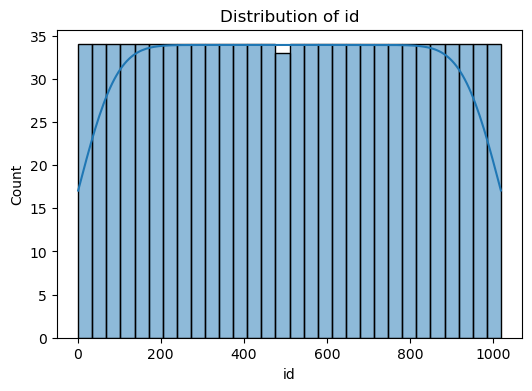

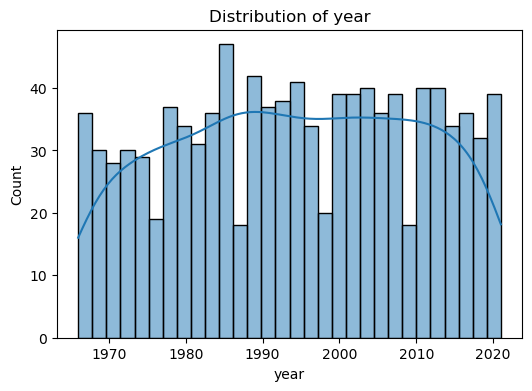

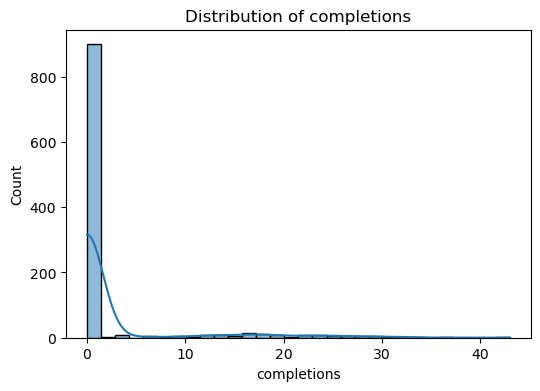

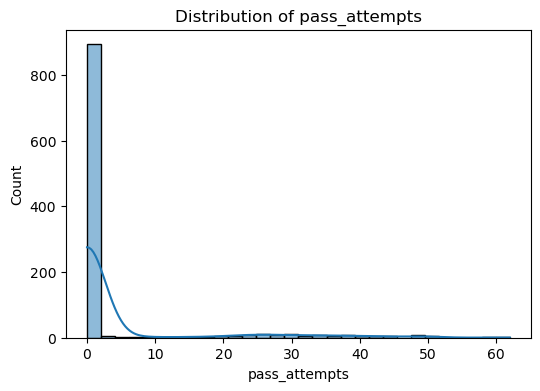

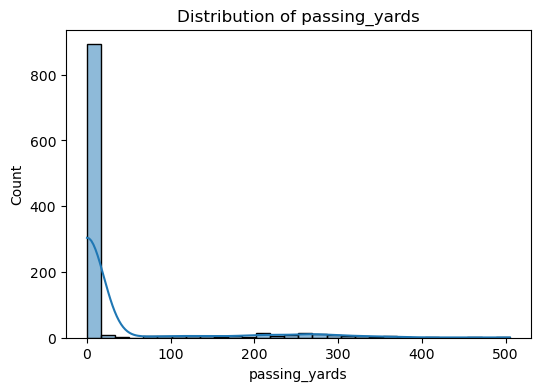

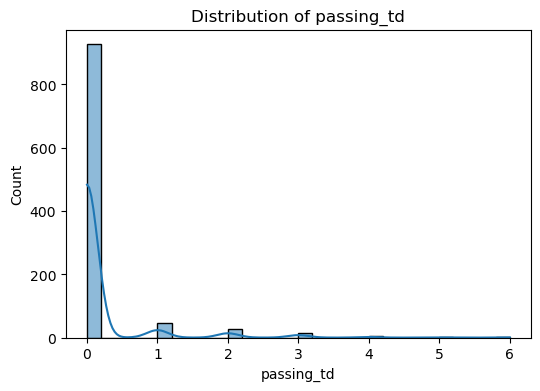

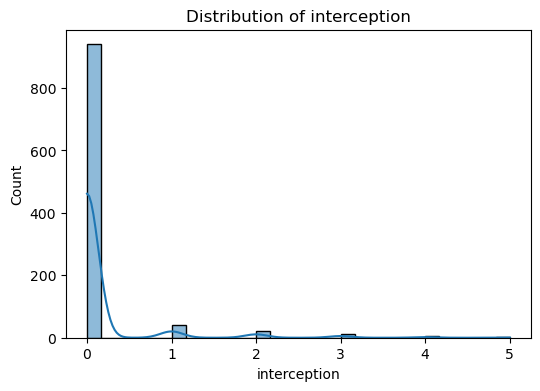

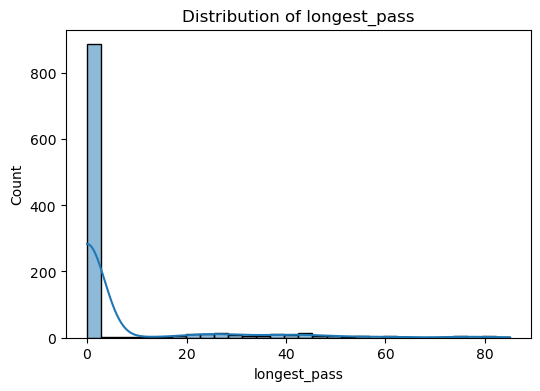

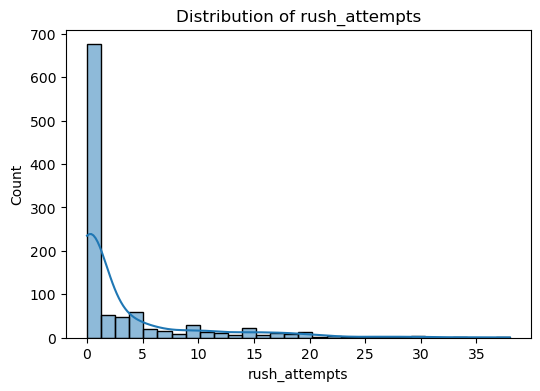

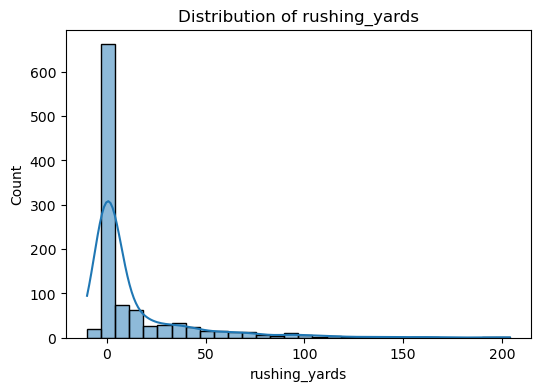

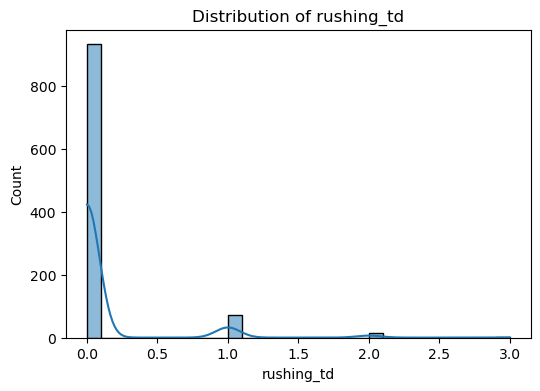

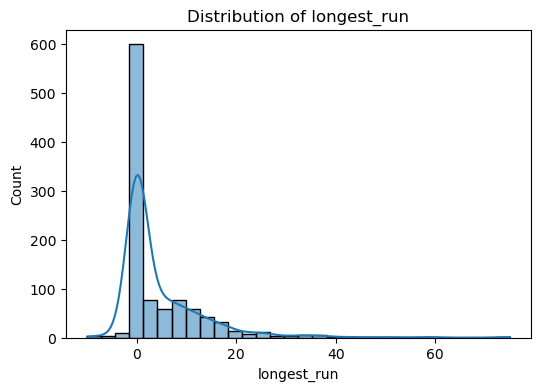

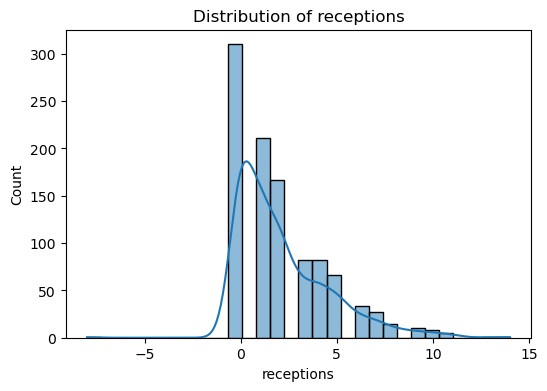

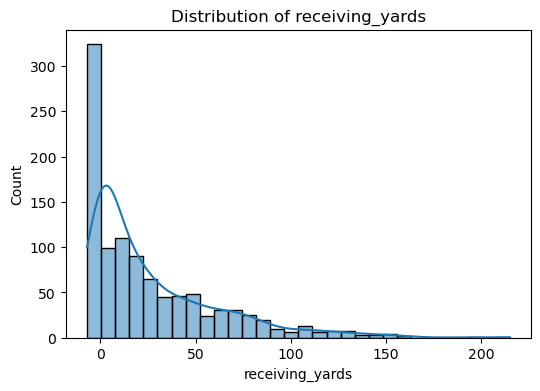

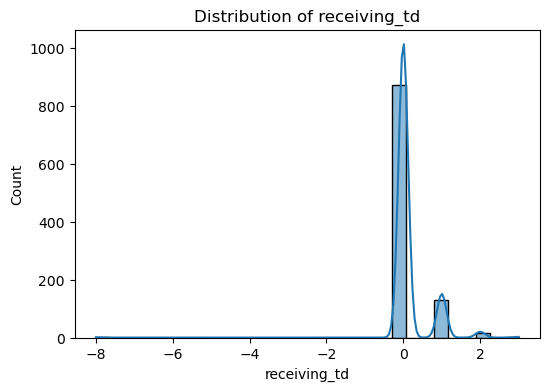

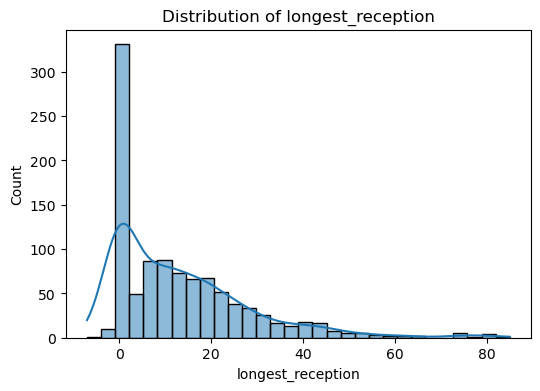

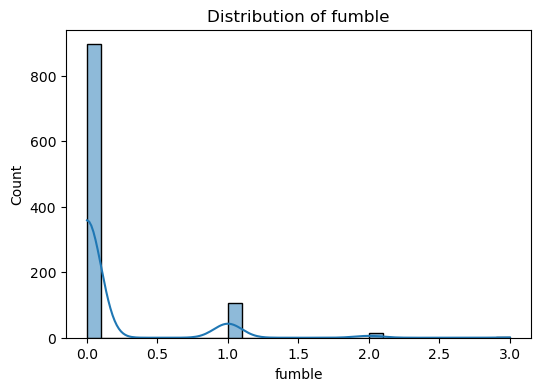

In [192]:
numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig("distribution_graph.png")
    plt.show()

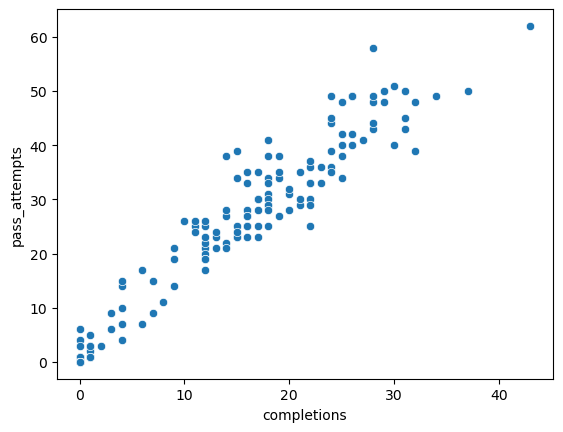

In [196]:
sns.scatterplot(x=data['completions'], y=data['pass_attempts'])
plt.savefig("scatterplot1_graph.png")

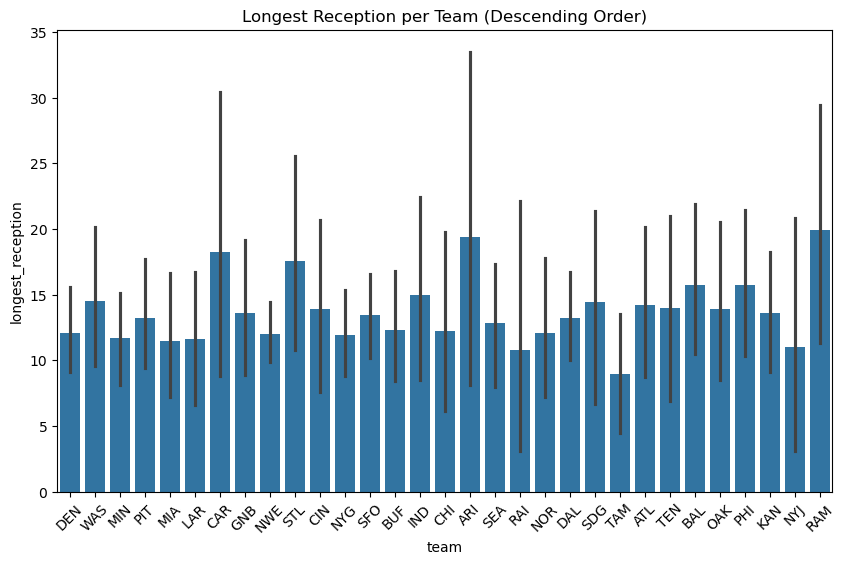

In [198]:
sorted_data = data.sort_values(by='longest_reception', ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='team', y='longest_reception', data=sorted_data)
plt.xticks(rotation=45)
plt.title('Longest Reception per Team (Descending Order)')
plt.savefig("barchart_graph.png")
plt.show()

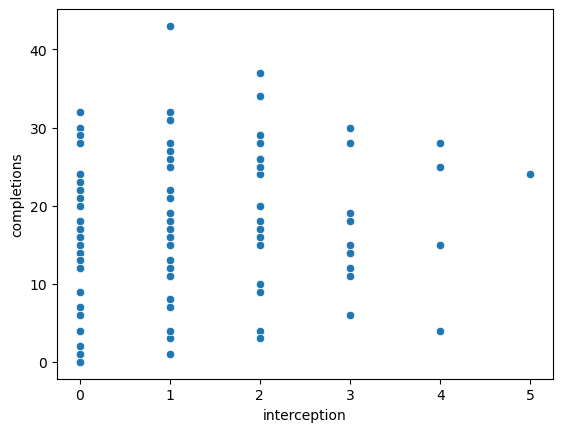

In [199]:
sns.scatterplot(x=data['interception'], y=data['completions'])
plt.savefig("scatterplot2_graph.png")

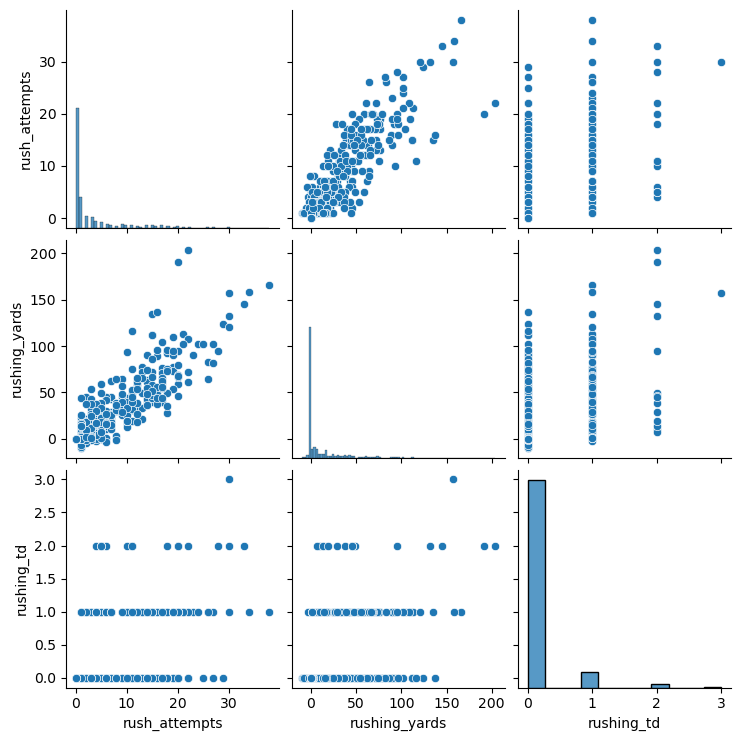

In [200]:
sns.pairplot(data[['rush_attempts', 'rushing_yards', 'rushing_td']])
plt.savefig("pairplot_graph.png")

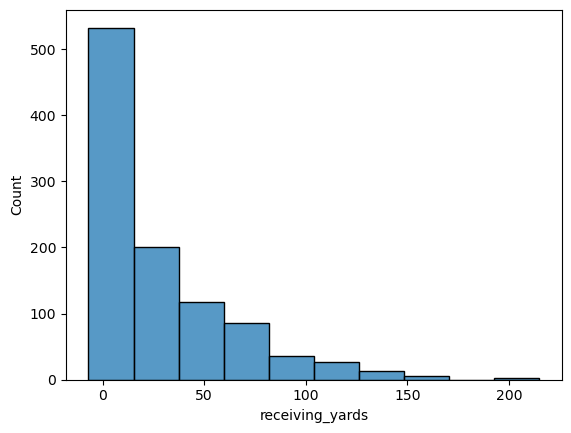

In [201]:
sns.histplot(data['receiving_yards'], bins=10)
plt.savefig("histogram1_graph.png")

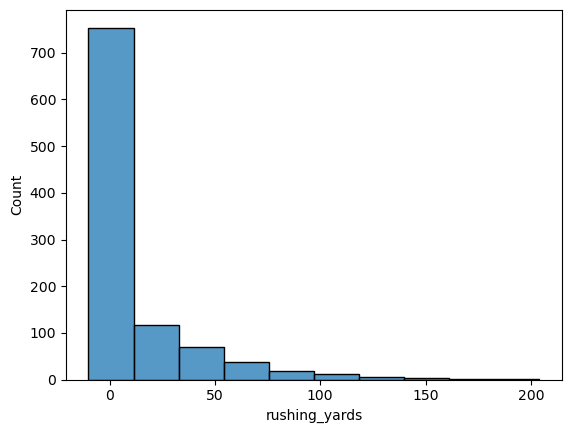

In [202]:
sns.histplot(data['rushing_yards'], bins=10)
plt.savefig("histogram2_graph.png")

## 4. Bivariate Analysis
### Questions for relationships between variables:
- How do rushing and passing touchdowns vary between superbowl teams?
- Is there a correlation between different numerical columns?


In [204]:
df_numeric = data_new.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

                         id      year  completions  pass_attempts  \
id                 1.000000 -0.999335    -0.056734      -0.040972   
year              -0.999335  1.000000     0.051692       0.035741   
completions       -0.056734  0.051692     1.000000       0.985385   
pass_attempts     -0.040972  0.035741     0.985385       1.000000   
passing_yards     -0.039226  0.034494     0.969260       0.964177   
passing_td        -0.032338  0.029533     0.780092       0.746753   
interception       0.037000 -0.041437     0.639645       0.705750   
times_sacked      -0.002411  0.002028     0.720462       0.761742   
sack_yards         0.012767 -0.013986     0.649034       0.705401   
longest_pass       0.038110 -0.043195     0.817886       0.835513   
qbr               -0.130397  0.134742     0.225309       0.044540   
rush_attempts      0.093713 -0.097366    -0.043687      -0.045031   
rushing_yards      0.061604 -0.065231    -0.028610      -0.028047   
rushing_td         0.033746 -0.035

ValueError: could not convert string to float: 'Joe Burrow'

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='team', y='rushing_td', data=data, orient='h')
plt.xticks(rotation=90)
plt.title('Rushing Touchdowns per Team')
plt.savefig("boxandwhisker.png")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='team', y='passing_td', data=data, orient='h')
plt.xticks(rotation=90)
plt.title('Passing Touchdowns per Team')
plt.savefig("boxandwhisker2.png")
plt.show()

## 5. Answering Key Questions
- What trends do you observe? - Defenses rising, increase in passing, offensive positive correlations
- What insights can you gain from the visualizations? - Emphasizing data trends, highlighting outliers, 
- Are there any surprising findings? - For me higher passing touchdowns than rushing touchdowns


## 6. Summary & Next Steps
- Summarize your key insights from the dataset. - This dataset gave valueable insights to the offensive statistics of superbowls from 1966-2021. Most of our data focused on passing and rushing statistics because we can use this to predict future outcomes of offense. We had key insights concluding a increase in passing, defenses rising, and offensive positive correlations.
- What additional analysis would you perform next? - Analyze a defensive data set then compare.
- How can this data be used for decision-making? - Can help superbowl sports betting, and offensive planning for players.